In [1]:
# to be done
# do we work with 2 different datasets (remove outliers vs log_transform) or we choose one? Or we in numerical analysis choose one?
# bedrooms remove higher values of 8/9?
# Where to include oversampling

# multi =1; means rea multi == 0 divide 
# numerical
#machine learning stuff

# Introduction

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Importing of dataset and checking dataset information

Since our data comes from several csv files. We created a column for the city name and a categorical column for whether the purchase was on a weekday. Checking the number of values in the columns, London and Rome have more than 9000 values which is significantly higher than some of the other cities. Thus we will do oversampling later to balance the data.

We also removed the 'unnamed: 0' column which is a duplicate index column.

In [3]:
def concatcsv(inputfile,output):
    tempdata = pd.read_csv(inputfile)
    tempdata['city'] = inputfile.split('_')[0]
    tempdata['weekdays'] = inputfile.split('_')[1].split('.')[0] == 'weekdays'
    output = pd.concat([output,tempdata],axis=0)
    return output

In [4]:
data = pd.read_csv('amsterdam_weekdays.csv',header='infer')
data['city']='amsterdam'
data['weekdays']=1
data.head()

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city,weekdays
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,...,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,amsterdam,1
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,...,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,amsterdam,1
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,...,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,amsterdam,1
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,...,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,amsterdam,1
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,...,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,amsterdam,1


In [5]:
data = concatcsv('amsterdam_weekends.csv',data)
data = concatcsv('athens_weekends.csv',data)
data = concatcsv('athens_weekdays.csv',data)
data = concatcsv('barcelona_weekends.csv',data)
data = concatcsv('barcelona_weekdays.csv',data)
data = concatcsv('berlin_weekends.csv',data)
data = concatcsv('berlin_weekdays.csv',data)
data = concatcsv('budapest_weekends.csv',data)
data = concatcsv('budapest_weekdays.csv',data)
data = concatcsv('lisbon_weekends.csv',data)
data = concatcsv('lisbon_weekdays.csv',data)
data = concatcsv('london_weekends.csv',data)
data = concatcsv('london_weekdays.csv',data)
data = concatcsv('paris_weekends.csv',data)
data = concatcsv('paris_weekdays.csv',data)
data = concatcsv('rome_weekends.csv',data)
data = concatcsv('rome_weekdays.csv',data)
data = concatcsv('vienna_weekends.csv',data)
data = concatcsv('vienna_weekdays.csv',data)

In [6]:
data['weekdays'].value_counts()

0    26207
1    25500
Name: weekdays, dtype: int64

In [7]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [8]:
data.drop(columns=data.columns[0],inplace=True)

In [9]:
# Reindexing after concatenation
data.reset_index(inplace=True)
data.drop(columns=data.columns[0],inplace=True)

In [10]:
print(data.dtypes)

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity               float64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating            float64
guest_satisfaction_overall    float64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
weekdays                        int64
dtype: object


In [11]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# About the dataset:

https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities?select=lisbon_weekends.csv

realSum: total price of the airbnb listing (numeric float)
room_type: Type of room offered (private,shared,etc.) (categorical)
room_shared: Whether the room_type is shared (boolean)
room_private: Whether the room_type is private (boolean)
person_capacity: maximum number of people that can stay in the room (numeric int)
host_is_superhost: Whether the host is a superhost, which is a verification that the host has been good (boolean)
multi: Whether the listing is for multiple rooms (boolean)
biz: Whether the listing is for business purposes (boolean)
cleanliness_rating: cleanliness rating of room from 1-10 (ordinal categorical)
guest_satisfaction_overall: overall guest satisfaction rating of room from 0-100 (numeric float)
bedrooms: number of bedrooms in the listing (ordinal categorical)
dist: distance from city centre (numeric float)
metro_dist: distance from nearest metro station (numeric float)
lng: longitude of listing (numeric float)
lat: lattitude of listing (numeric float)
city: city where listing is located (Str)
weekdays: Whether the listing is on a weekday(1) or weekend(0) (boolean)

In [12]:
# multiindex = data[data['multi']==1].index

In [13]:
# newdf = pd.DataFrame(data)
# ar = []
# for i in range(0,51707):
#     if (i in multiindex and data['bedrooms'][i]!=0):
#         ar.append(float(data['realSum'][i]/data['bedrooms'][i]))
#     else:
#         ar.append(data['realSum'][i])
# data['modified']=ar

In [14]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.00000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000,51707.000000
mean,279.879591,3.161661,0.291353,0.350204,9.390624,92.628232,1.15876,3.191285,0.681540,294.204105,13.423792,626.856696,22.786177,7.426068,45.671128,0.493163
std,327.948386,1.298545,0.454390,0.477038,0.954868,8.945531,0.62741,2.393803,0.858023,224.754123,9.807985,497.920226,17.804096,9.799725,5.249263,0.499958
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.00000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,148.752174,2.000000,0.000000,0.000000,9.000000,90.000000,1.00000,1.453142,0.248480,136.797385,6.380926,250.854114,8.751480,-0.072500,41.399510,0.000000
50%,211.343089,3.000000,0.000000,0.000000,10.000000,95.000000,1.00000,2.613538,0.413269,234.331748,11.468305,522.052783,17.542238,4.873000,47.506690,0.000000
75%,319.694287,4.000000,1.000000,1.000000,10.000000,99.000000,1.00000,4.263077,0.737840,385.756381,17.415082,832.628988,32.964603,13.518825,51.471885,1.000000
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.00000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# Cleaing and preparing of dataset

Firstly, we check for any null values or duplicated values.

In [15]:
print(data.isnull().sum())

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
city                          0
weekdays                      0
dtype: int64


In [16]:
data.duplicated().sum()

0

<AxesSubplot:xlabel='realSum', ylabel='Count'>

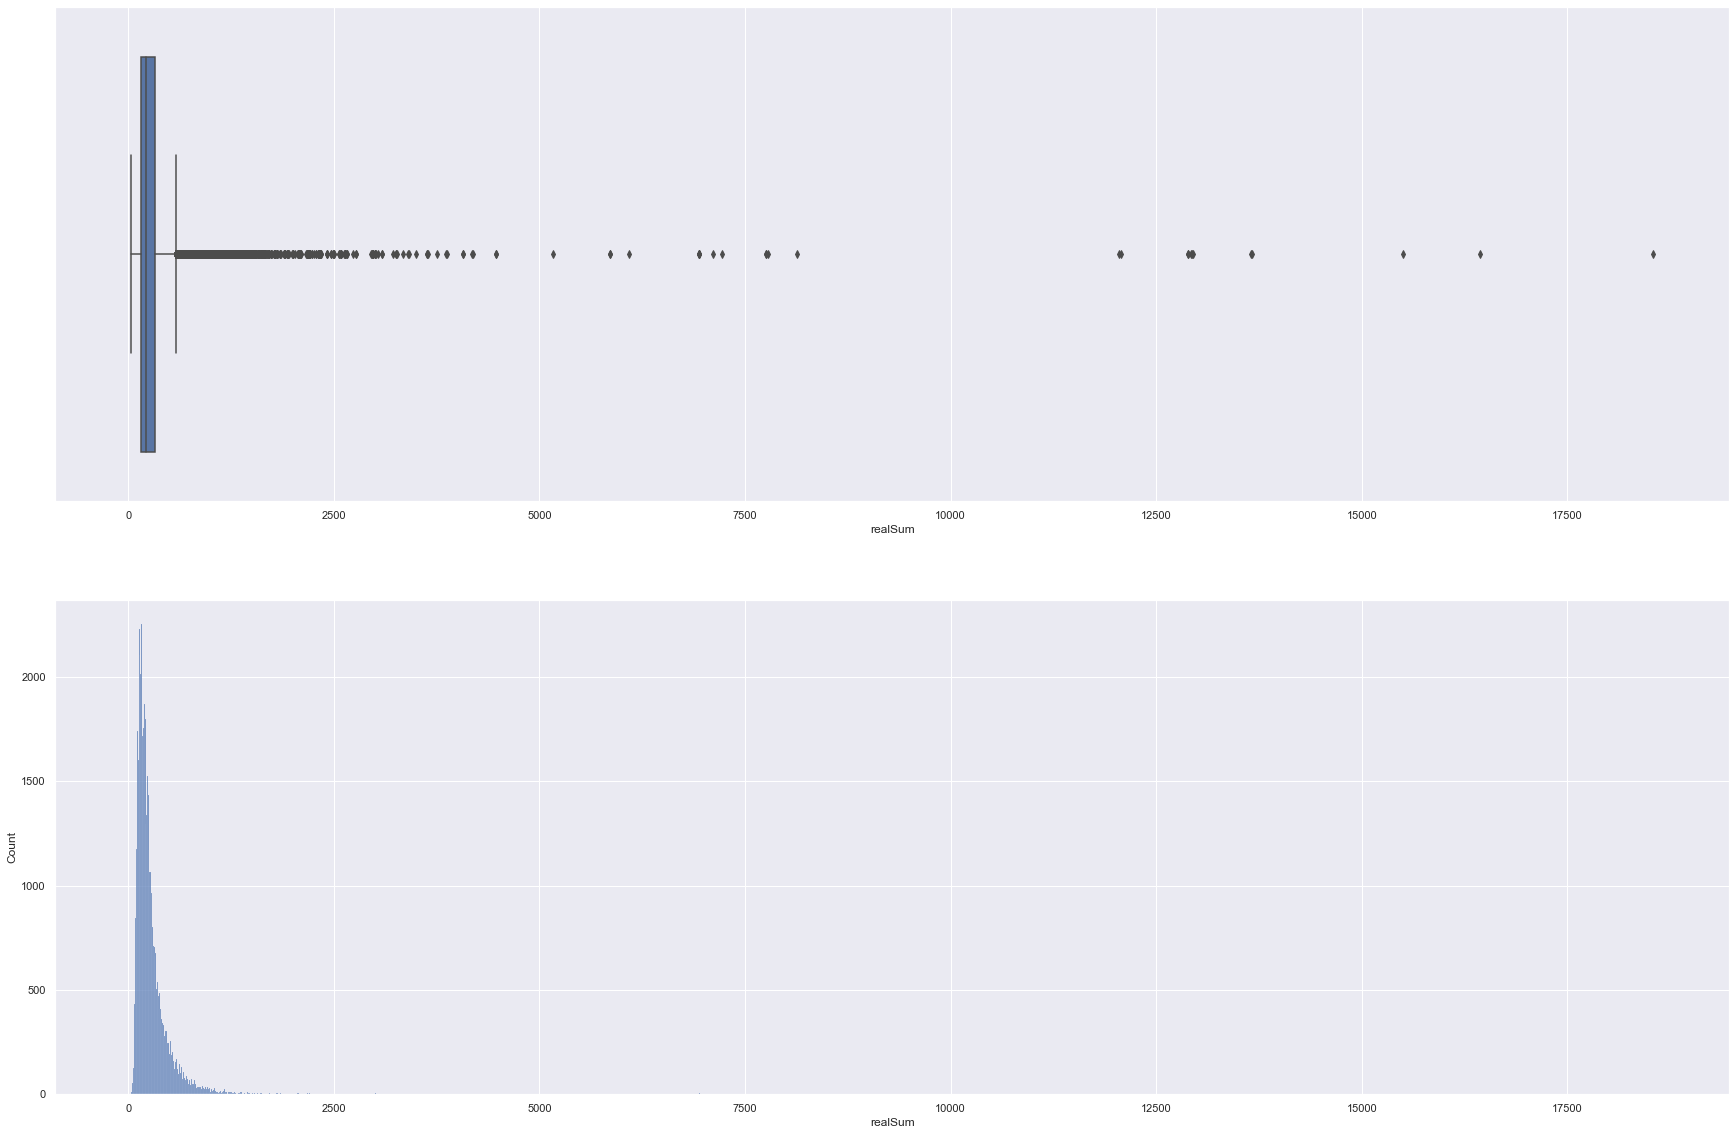

In [17]:
f, axes = plt.subplots(2, 1, figsize=(30, 20))
sb.boxplot(x=data['realSum'],orient = 'h', ax = axes[0])
sb.histplot(data=data['realSum'], ax= axes[1])

In [18]:
data['realSum'].skew()

21.419956563350983

# Reducing skewness of data

Looking at the boxplot, there appears to be many extreme values. The histplot indicates that the data is positive skewed with many and large outliers. The median being around 211 but there are many listings above even the 2500 mark. The skew being about 21.4 also indicates that data is highly skewed to the right.

To reduce skewness of data, we will removing outliers with interquartile range (IQR)

# Removing outliers with IQR

 First checking the values of lower and upper limit, since lower limit is below 0, we do not have any outliers below lower limit. Before removal, we checked the spread of cities and room type in the outliers to make sure we are not removing too many data of a certain attribute. The cities and room type seem proportional to the number of each attribute in our original dataset so we decided to remove these outliers.

In [19]:
def outlier(df, col):
    sorted(df[col])
    Q1,Q3 = np.percentile(df[col] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [20]:
lower , upper = outlier(data, 'realSum')
print("lower: ",lower)
print("upper: ",upper)

lower:  -107.660995498034
upper:  576.1074557199221


In [21]:
tempdf = data[data['realSum']>upper]

In [22]:
data['city'].value_counts()

london       9993
rome         9027
paris        6688
lisbon       5763
athens       5280
budapest     4022
vienna       3537
barcelona    2833
berlin       2484
amsterdam    2080
Name: city, dtype: int64

In [23]:
tempdf['city'].value_counts()

london       1332
paris         979
amsterdam     740
barcelona     231
berlin        104
rome           87
lisbon         67
vienna         54
budapest       42
athens         26
Name: city, dtype: int64

In [24]:
data['room_type'].value_counts()

Entire home/apt    32648
Private room       18693
Shared room          366
Name: room_type, dtype: int64

In [25]:
tempdf['room_type'].value_counts()

Entire home/apt    3312
Private room        348
Shared room           2
Name: room_type, dtype: int64

In [26]:
outlierindex = data[data['realSum']>upper].index
data_without_outliers = pd.DataFrame(data)
data.drop(index = outlierindex, inplace=True)

<AxesSubplot:xlabel='realSum', ylabel='Count'>

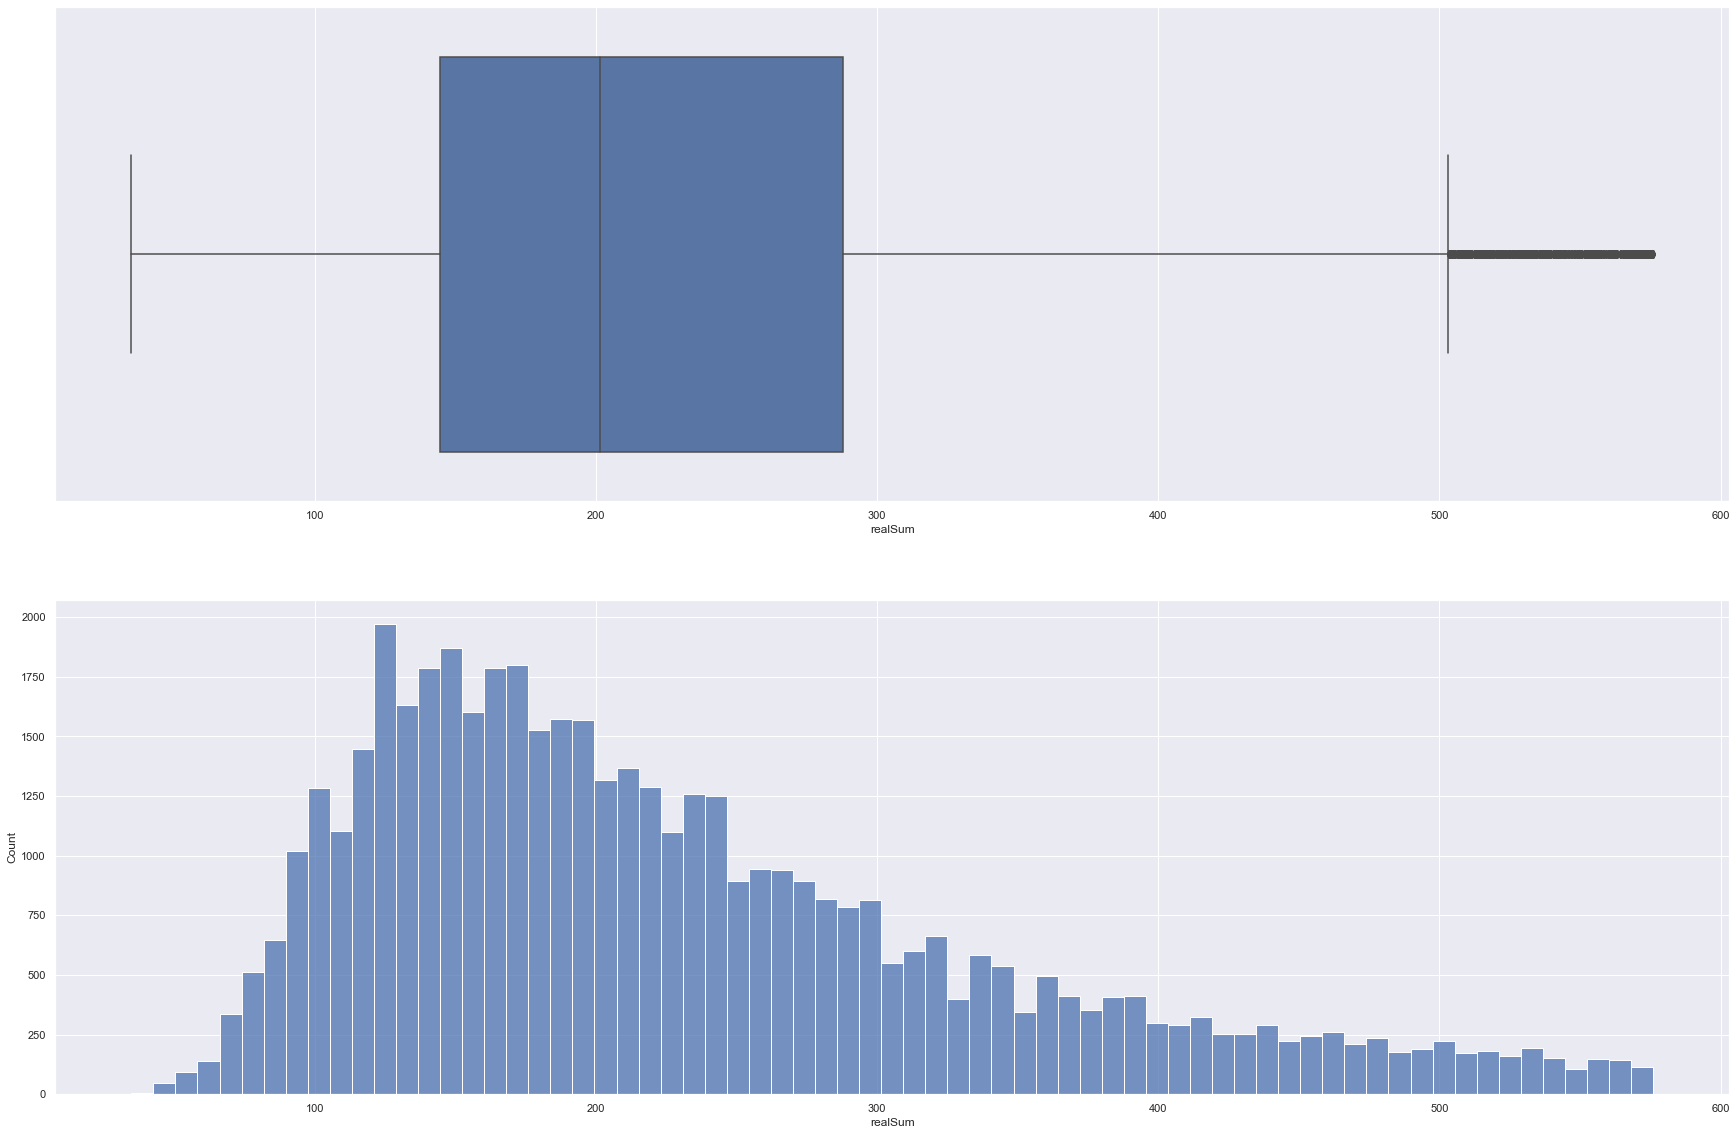

In [27]:
f, axes = plt.subplots(2, 1, figsize=(30, 20))
sb.boxplot(x=data['realSum'],orient = 'h', ax = axes[0])
sb.histplot(data=data['realSum'], ax= axes[1])

In [28]:
data['realSum'].skew()

0.990397565302506

In [29]:
data.describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000,48045.000000
mean,228.980509,3.080508,0.297180,0.344594,9.392195,92.623998,1.114268,3.220743,0.694782,284.500524,12.645012,612.677575,22.177030,7.775791,45.363121,0.494224
std,112.045344,1.257321,0.457021,0.475241,0.949289,8.846102,0.589233,2.419218,0.875992,220.682319,8.946050,495.012071,17.474249,10.001482,5.233822,0.499972
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.034661,0.002301,15.152201,0.926301,19.576924,0.592757,-9.226340,37.953000,0.000000
25%,144.483670,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.466737,0.252976,131.561600,6.108598,240.941700,8.399890,-0.067010,41.385580,0.000000
50%,201.529002,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.633319,0.419622,225.172721,10.944695,505.584280,17.144208,12.410750,47.497010,0.000000
75%,287.992495,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,4.298471,0.751382,369.914228,16.459358,815.825639,32.057789,16.333600,51.439000,1.000000
max,576.008948,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000,23.786020,52.641410,1.000000


# Exploratory Data Analysis (EDA)

Now we will analyse each variable and how it is correlated to our target variable 'realSum'. Variables with high correlation will be used for our model. We have split our variables into numeric and categorical for easier analysis.

Additional note: 'Guest_satisfaction_overall' is a numeric variable while 'cleanliness_rating' is a categorical data despite being float type.

# a) Numerical Analysis

# Description: 
Firstly, we will analyse the numerical variables in the dataset, checking their correlation with our 2 sets of data.

a1) dist
a2) metro_dist
a3) guest_satisfaction_overall
# Analysis:



In [30]:
dist = pd.DataFrame(data_without_outliers['dist'])
metrodist = pd.DataFrame(data_without_outliers['metro_dist'])
guest_satisfaction = pd.DataFrame(data_without_outliers['guest_satisfaction_overall'])

<AxesSubplot:>

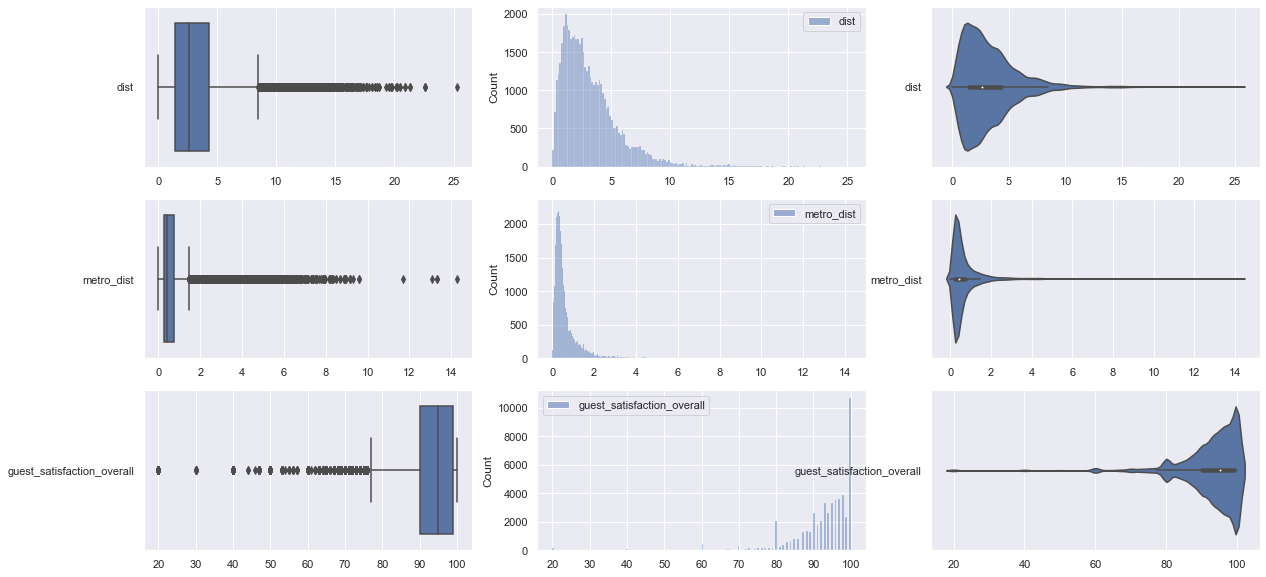

In [31]:
f, axes = plt.subplots(3, 3, figsize=(20, 10))

sb.boxplot(data = dist, orient = "h", ax = axes[0,0])
sb.histplot(data = dist, ax = axes[0,1])
sb.violinplot(data = dist, orient = "h", ax = axes[0,2])

sb.boxplot(data = metrodist, orient = "h", ax = axes[1,0])
sb.histplot(data = metrodist, ax = axes[1,1])
sb.violinplot(data = metrodist, orient = "h", ax = axes[1,2])

sb.boxplot(data = guest_satisfaction, orient = "h", ax = axes[2,0])
sb.histplot(data = guest_satisfaction, ax = axes[2,1])
sb.violinplot(data = guest_satisfaction, orient = "h", ax = axes[2,2])

In [32]:
jointdf = pd.concat([data_without_outliers['realSum'],dist,metrodist,guest_satisfaction],axis=1)

<AxesSubplot:>

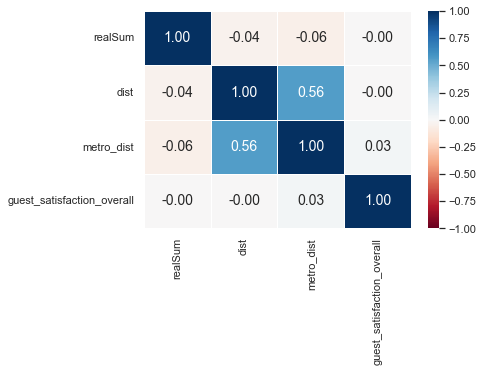

In [33]:
sb.heatmap(jointdf.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

# b) Categorical Analysis

Description: Next, we will analyse the categorical variables in the dataset.

b1) room_type
b2) person_capacity
b3) host_is_superhost
b4) multi
b5) biz
b6) cleanliness_rating
b7) bedrooms
b8) city
b9) weekdays

# # b1) room_type

Additional note: We have decided to disregard the room_shared and room_private columns as those columns are represented by the room_type column.

Analysis: The results show that entire home/apt are the most expensive on average followed by private room then shared room. This makes sense as we would expect purchasing more rooms to be more expensive and private room should be priced higher than shared room due to privacy being a beneficial trait. The boxplots for the 3 room_types are significantly different, thus room_type seems to be correlated to realSum.



In [34]:
print(data['room_type'].value_counts())
print(data['room_private'].value_counts())
print(data['room_shared'].value_counts())

Entire home/apt    29336
Private room       18345
Shared room          364
Name: room_type, dtype: int64
False    29700
True     18345
Name: room_private, dtype: int64
False    47681
True       364
Name: room_shared, dtype: int64


Private room:
 count    18345.000000
mean       188.040561
std         89.849367
min         34.779339
25%        126.949244
50%        164.161904
75%        224.840659
max        576.008948
Name: realSum, dtype: float64
Entire home/apt:
 count    29336.000000
mean       255.671884
std        116.582949
min         37.129295
25%        167.682927
50%        231.931300
75%        323.802399
max        576.008948
Name: realSum, dtype: float64
Shared room:
 count    364.000000
mean     141.137596
std       72.293996
min       53.343986
25%       97.807345
50%      124.296435
75%      157.520800
max      556.202815
Name: realSum, dtype: float64


<Figure size 720x7200 with 0 Axes>

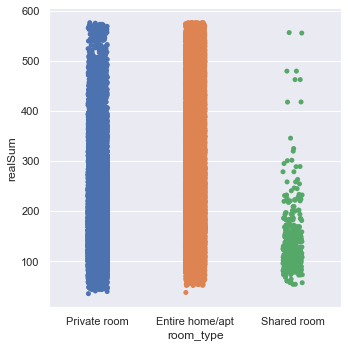

<Figure size 720x7200 with 0 Axes>

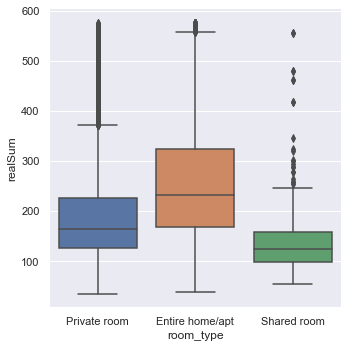

<Figure size 720x7200 with 0 Axes>

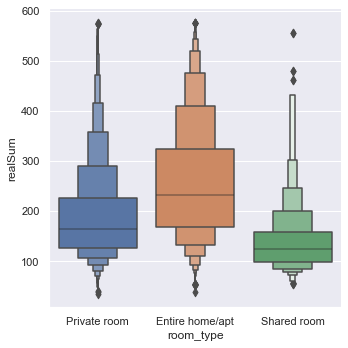

In [35]:
#room type
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="room_type", y="realSum",)
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="room_type", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data,x="room_type", y="realSum", kind="boxen",
)
print("Private room:\n",(data['realSum'].loc[data['room_type'] =='Private room']).describe())
print("Entire home/apt:\n",(data['realSum'].loc[data['room_type'] =='Entire home/apt']).describe())
print("Shared room:\n",(data['realSum'].loc[data['room_type'] =='Shared room']).describe())

# b2) person_capacity

Analysis: As expected, listings with a higher person_capacity are on average more expensive. As the boxplots for each category differs significantly, person_capacity seems to be correlated to 'realSum'.

In [36]:
data['person_capacity'].value_counts()

2.0    23703
4.0    12507
3.0     5957
6.0     3308
5.0     2570
Name: person_capacity, dtype: int64

2.0:
 count    23703.000000
mean       206.483239
std         99.658623
min         34.779339
25%        133.442777
50%        181.519700
75%        254.683568
max        575.507420
Name: realSum, dtype: float64
4.0:
 count    5957.000000
mean      215.308259
std       104.226167
min        39.009259
25%       138.405069
50%       190.073177
75%       266.679165
max       575.977798
Name: realSum, dtype: float64
6.0:
 count    12507.000000
mean       253.315166
std        118.070773
min         46.165022
25%        162.397769
50%        227.720450
75%        320.325993
max        576.008948
Name: realSum, dtype: float64
8.0:
 count    2570.000000
mean      262.328390
std       120.482145
min        68.193003
25%       168.021934
50%       234.349449
75%       336.097076
max       575.046904
Name: realSum, dtype: float64
10.0:
 count    3308.000000
mean      296.888854
std       126.337207
min        53.108991
25%       194.924368
50%       280.098954
75%       390.575696
max       575.

<Figure size 720x7200 with 0 Axes>

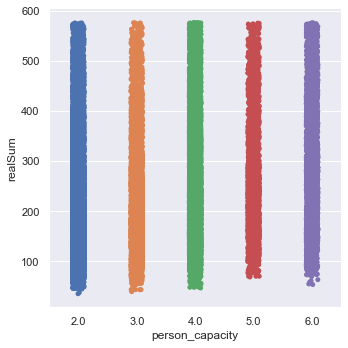

<Figure size 720x7200 with 0 Axes>

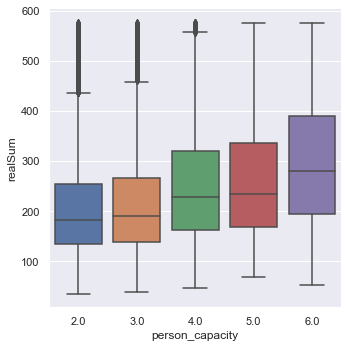

<Figure size 720x7200 with 0 Axes>

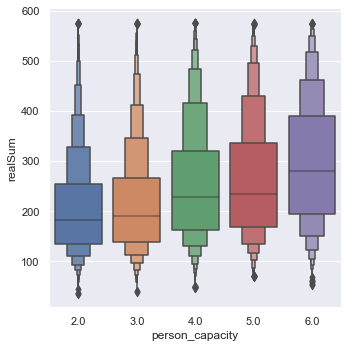

In [37]:
#person capacity
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="person_capacity", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="person_capacity", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("person_capacity"),
    x="person_capacity", y="realSum", kind="boxen",
)
print("2.0:\n",(data['realSum'].loc[data['person_capacity']==2.0]).describe())
print("4.0:\n",(data['realSum'].loc[data['person_capacity']==3.0]).describe())
print("6.0:\n",(data['realSum'].loc[data['person_capacity']==4.0]).describe())
print("8.0:\n",(data['realSum'].loc[data['person_capacity']==5.0]).describe())
print("10.0:\n",(data['realSum'].loc[data['person_capacity']==6.0]).describe())

# b3) host_is_superhost

Description: The suerhost title assures customers that the seller has a past history of successful sales and also a high review rating. We expect this to be an important variable in affecting realSum as we consider the assurance that the listing is legitimate to be important.

Analysis: Contrary to our expectations, the boxplots are quite similar, indicating that there is not much difference in realSum between a superhost and a non-superhost. In fact, the median realSum of superhost is lower than that of a non-superhost. This could be due to lower price of listings attracting more buyers while also leading to buyers having a better impression and leaving better reviews. Thus, we shall not use 'host_is_superhost' as a variable for our model.

Host not superhost:
 count    35489.000000
mean       233.553744
std        114.944835
min         34.779339
25%        145.925943
50%        205.790353
75%        295.678190
max        576.008948
Name: realSum, dtype: float64
Host is superhost:
 count    12556.000000
mean       216.054457
std        102.316167
min         45.227662
25%        140.522797
50%        191.221616
75%        265.821897
max        575.977798
Name: realSum, dtype: float64


<Figure size 720x7200 with 0 Axes>

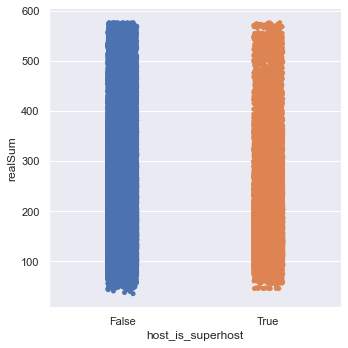

<Figure size 720x7200 with 0 Axes>

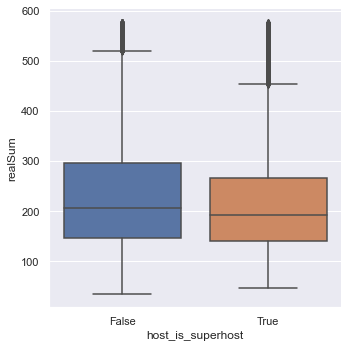

<Figure size 720x7200 with 0 Axes>

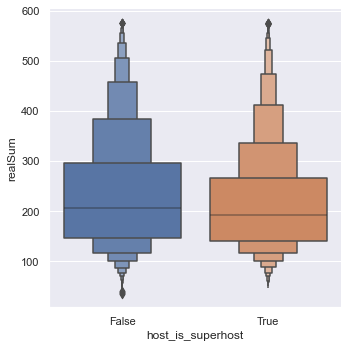

In [38]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="host_is_superhost", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="host_is_superhost", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("host_is_superhost"),
    x="host_is_superhost", y="realSum", kind="boxen",
)
print("Host not superhost:\n",(data['realSum'].loc[data['host_is_superhost']==False]).describe())
print("Host is superhost:\n",(data['realSum'].loc[data['host_is_superhost']==True]).describe())

# b4) multi
Analysis:

Listing not for multiple rooms:
 count    33767.000000
mean       234.784290
std        113.783097
min         37.129295
25%        147.990555
50%        207.501057
75%        296.573297
max        576.008948
Name: realSum, dtype: float64
Listing for multiple rooms:
 count    14278.000000
mean       215.254758
std        106.577816
min         34.779339
25%        138.171276
50%        186.975235
75%        265.057974
max        576.008948
Name: realSum, dtype: float64


<Figure size 720x7200 with 0 Axes>

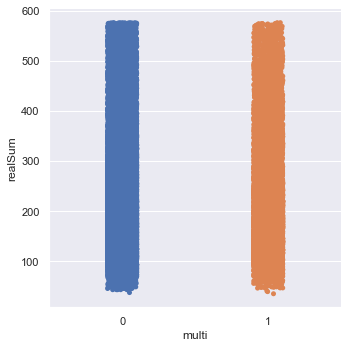

<Figure size 720x7200 with 0 Axes>

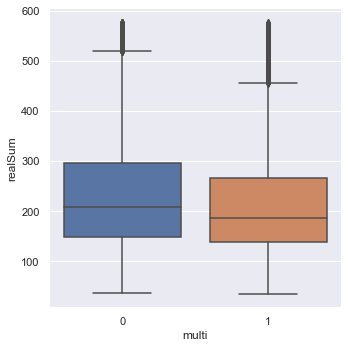

<Figure size 720x7200 with 0 Axes>

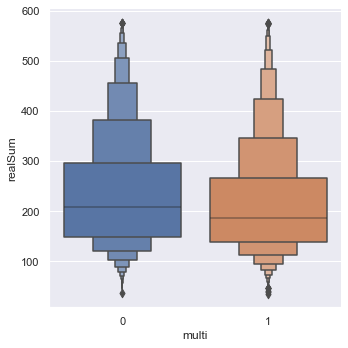

In [39]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="multi", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="multi", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("multi"),
    x="multi", y="realSum", kind="boxen",
)

print("Listing not for multiple rooms:\n",(data['realSum'].loc[data['multi']==0]).describe())
print("Listing for multiple rooms:\n",(data['realSum'].loc[data['multi']==1]).describe())

# b5) biz
Analysis:

Listing is not for business:
 count    31489.000000
mean       223.051092
std        109.347956
min         34.779339
25%        141.394784
50%        195.917986
75%        277.984901
max        576.008948
Name: realSum, dtype: float64
Listing for business:
 count    16556.000000
mean       240.258078
std        116.175340
min         42.884259
25%        149.860894
50%        213.180113
75%        304.789209
max        575.977798
Name: realSum, dtype: float64


<Figure size 720x7200 with 0 Axes>

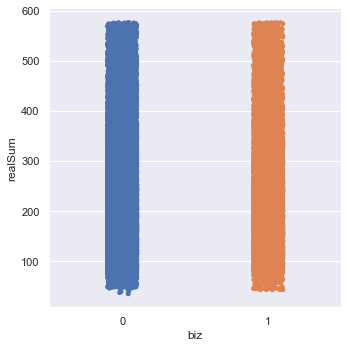

<Figure size 720x7200 with 0 Axes>

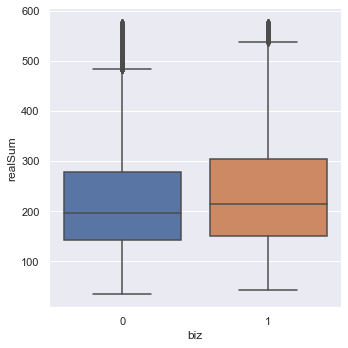

<Figure size 720x7200 with 0 Axes>

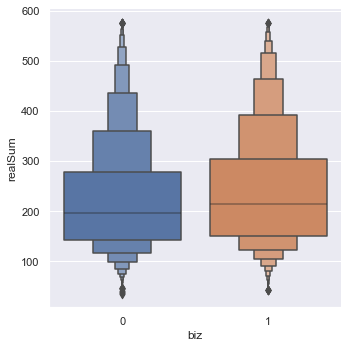

In [40]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="biz", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="biz", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("biz"),
    x="biz", y="realSum", kind="boxen",
)
print("Listing is not for business:\n",(data['realSum'].loc[data['biz']== 0]).describe())
print("Listing for business:\n",(data['realSum'].loc[data['biz']==1]).describe())


# b6) Cleanliness_rating

# Description:
We decided to merge the ratings below 6 into a category (<6) due to the lower number count.

Analysis:

In [41]:
data['cleanliness_rating'].value_counts()

10.0    27918
9.0     14424
8.0      4017
7.0       877
6.0       458
4.0       131
2.0       125
5.0        85
3.0        10
Name: cleanliness_rating, dtype: int64

Cleanliness rating 2.0:
 count    125.000000
mean     240.214076
std      127.867038
min       46.057092
25%      137.115172
50%      207.201486
75%      310.449446
max      554.105224
Name: realSum, dtype: float64
Cleanliness rating 4.0:
 count    131.000000
mean     275.557866
std      143.203726
min       57.882033
25%      152.388172
50%      232.837085
75%      406.524142
max      561.128308
Name: realSum, dtype: float64
Cleanliness rating 6.0:
 count    458.000000
mean     246.400644
std      128.476558
min       54.328653
25%      150.659903
50%      210.717458
75%      332.909993
max      575.507420
Name: realSum, dtype: float64
Cleanliness rating 8.0:
 count    4017.000000
mean      228.027537
std       118.056837
min        47.571064
25%       138.526306
50%       195.498182
75%       293.751029
max       575.977798
Name: realSum, dtype: float64
Cleanliness rating 10.0:
 count    27918.000000
mean       228.632697
std        110.092033
min         34.779339
25%        145.227

<Figure size 720x7200 with 0 Axes>

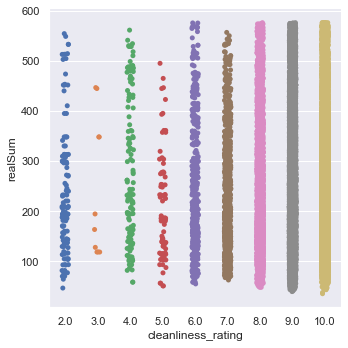

<Figure size 720x7200 with 0 Axes>

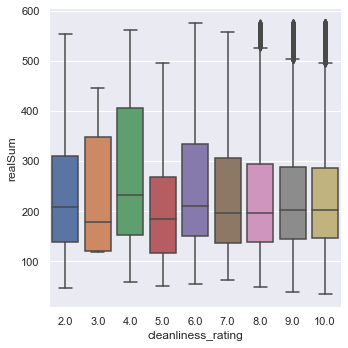

<Figure size 720x7200 with 0 Axes>

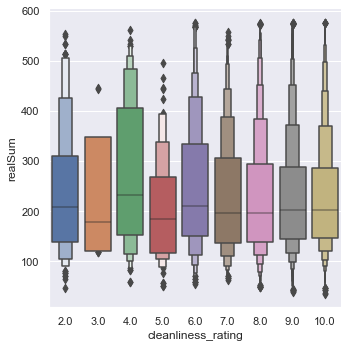

In [42]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="cleanliness_rating", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="cleanliness_rating", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("cleanliness_rating"),
    x="cleanliness_rating", y="realSum", kind="boxen",
)
print("Cleanliness rating 2.0:\n",(data['realSum'].loc[data['cleanliness_rating']== 2.0]).describe())
print("Cleanliness rating 4.0:\n",(data['realSum'].loc[data['cleanliness_rating']==4.0]).describe())
print("Cleanliness rating 6.0:\n",(data['realSum'].loc[data['cleanliness_rating']== 6.0]).describe())
print("Cleanliness rating 8.0:\n",(data['realSum'].loc[data['cleanliness_rating']==8.0]).describe())
print("Cleanliness rating 10.0:\n",(data['realSum'].loc[data['cleanliness_rating']== 10.0]).describe())

In [43]:
data[data['biz']==1].describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,16556.000000,16556.000000,16556.0,16556.0,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000,16556.000000
mean,240.258078,3.247584,0.0,1.0,9.245712,90.084682,1.083051,2.650836,0.569036,317.710926,13.608238,700.048664,24.414562,6.628694,44.368027,0.504892
std,116.175340,1.306077,0.0,0.0,1.005225,10.102881,0.608348,2.026904,0.662197,236.784826,9.736855,540.951409,18.511930,11.101462,5.294130,0.499991
min,42.884259,2.000000,0.0,1.0,2.000000,20.000000,0.000000,0.039814,0.002301,19.378546,1.156829,26.509371,0.640721,-9.226340,37.954000,0.000000
25%,149.860894,2.000000,0.0,1.0,9.000000,86.000000,1.000000,1.174085,0.239683,143.347064,6.213007,295.230610,10.041909,-0.169160,38.721655,0.000000
50%,213.180113,3.000000,0.0,1.0,9.000000,92.000000,1.000000,2.170106,0.388945,260.359013,11.677232,589.732786,18.949056,2.373395,41.906000,1.000000
75%,304.789209,4.000000,0.0,1.0,10.000000,97.000000,1.000000,3.644935,0.629599,423.931346,18.193714,928.838796,35.202354,16.344628,48.871403,1.000000
max,575.977798,6.000000,0.0,1.0,10.000000,100.000000,9.000000,18.511822,9.286229,4513.563486,100.000000,6696.156772,100.000000,23.777020,52.563330,1.000000


In [44]:
data[data['bedrooms']==0].describe()

,realSum,person_capacity,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,weekdays
count,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.0,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000,4348.000000
mean,238.469445,2.546918,0.230451,0.427553,9.253450,90.711822,0.0,2.827726,0.498883,301.008029,15.250205,635.045640,28.396029,7.799904,46.824842,0.492180
std,102.459957,0.843032,0.421170,0.494780,1.067828,10.485367,0.0,2.130612,0.653958,203.741106,9.358943,449.839609,20.292950,9.734821,4.728302,0.499996
min,44.179161,2.000000,0.000000,0.000000,2.000000,20.000000,0.0,0.062962,0.003220,19.378546,1.191735,26.509371,0.640721,-9.225990,37.958060,0.000000
25%,159.474623,2.000000,0.000000,0.000000,9.000000,88.000000,0.0,1.211514,0.198819,157.449288,8.503819,282.325944,11.770485,2.170263,41.907600,0.000000
50%,220.432466,2.000000,0.000000,0.000000,10.000000,93.000000,0.0,2.413078,0.334405,263.456196,13.630810,591.718550,24.900846,2.377770,48.833255,0.000000
75%,299.953096,3.000000,0.000000,1.000000,10.000000,97.000000,0.0,3.935293,0.515952,398.837389,20.589659,840.622057,42.923361,16.391000,48.887105,1.000000
max,574.610868,6.000000,1.000000,1.000000,10.000000,100.000000,0.0,20.495678,8.187105,3031.840298,100.000000,4590.306687,100.000000,23.766360,52.609220,1.000000


# b7) bedrooms

 number of bedrooms in the listing, indicates size of house 
 #Analysis:

In [45]:
data['bedrooms'].value_counts()

1     35049
2      7612
0      4348
3       957
4        60
9        10
5         5
10        2
8         2
Name: bedrooms, dtype: int64

0 Bedrooms:
 count    4348.000000
mean      238.469445
std       102.459957
min        44.179161
25%       159.474623
50%       220.432466
75%       299.953096
max       574.610868
Name: realSum, dtype: float64
1 Bedrooms:
 count    35049.000000
mean       215.137101
std        105.766650
min         34.779339
25%        137.547420
50%        187.735254
75%        265.528352
max        576.008948
Name: realSum, dtype: float64
2 Bedrooms:
 count    7612.000000
mean      275.590277
std       123.670659
min        37.129295
25%       176.481647
50%       252.878642
75%       357.589119
max       576.008948
Name: realSum, dtype: float64
3 Bedrooms:
 count    957.000000
mean     318.602446
std      128.906103
min       39.009259
25%      220.279802
50%      307.692308
75%      416.979362
max      574.194001
Name: realSum, dtype: float64
4 Bedrooms:
 count     60.000000
mean     301.433839
std      149.077092
min       77.377173
25%      147.169501
50%      335.967450
75%      419.265947
max

<Figure size 720x7200 with 0 Axes>

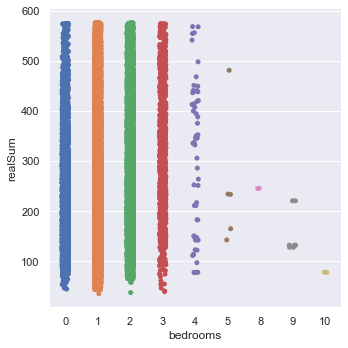

<Figure size 720x7200 with 0 Axes>

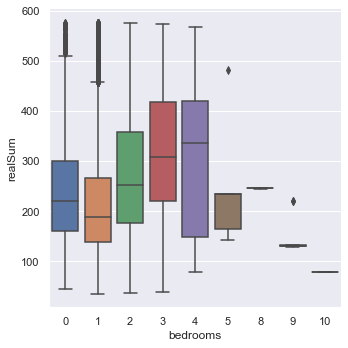

<Figure size 720x7200 with 0 Axes>

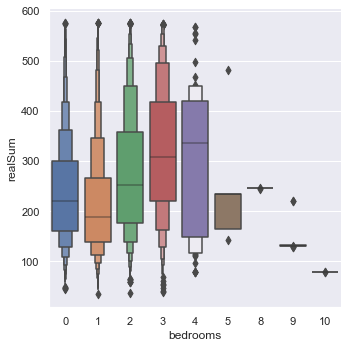

In [46]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="bedrooms", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="bedrooms", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("bedrooms"),
    x="bedrooms", y="realSum", kind="boxen",
)
print("0 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 0]).describe())
print("1 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 1]).describe())
print("2 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 2]).describe())
print("3 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==3]).describe())
print("4 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 4]).describe())
print("5 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==5]).describe())
print("6 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 6]).describe())
print("7 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 7]).describe())
print("8 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==8]).describe())
print("9 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']== 9]).describe())
print("10 Bedrooms:\n",(data['realSum'].loc[data['bedrooms']==10]).describe())

# b?) Total tenant capacity

beeg papa multi==0 bedroom x capacity BEDROOM ==0 capacity

# b8) city
Analysis:

amsterdam:
 count    1340.000000
mean      369.803200
std       102.338939
min       128.887118
25%       288.707145
50%       368.617158
75%       446.476695
max       572.727486
Name: realSum, dtype: float64
athens:
 count    5254.000000
mean      145.680222
std        71.665177
min        42.884259
25%        98.657231
50%       127.715417
75%       170.599677
max       562.416516
Name: realSum, dtype: float64
barcelona:
 count    2602.000000
mean      235.132276
std       112.327676
min        69.588289
25%       156.166360
50%       196.895292
75%       286.673494
max       574.161566
Name: realSum, dtype: float64
berlin:
 count    2380.000000
mean      214.763642
std        97.593738
min        64.971487
25%       142.797046
50%       185.566047
75%       264.793867
max       568.149949
Name: realSum, dtype: float64
budapest:
 count    3980.000000
mean      168.058828
std        70.445790
min        34.779339
25%       124.782629
50%       152.277107
75%       195.398787
max     

<Figure size 720x7200 with 0 Axes>

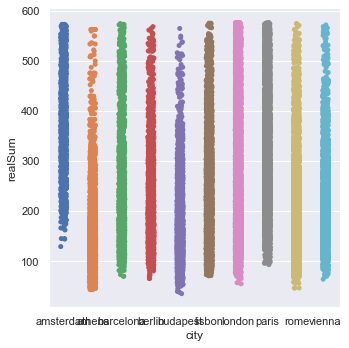

<Figure size 720x7200 with 0 Axes>

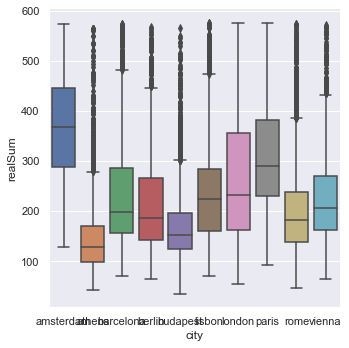

<Figure size 720x7200 with 0 Axes>

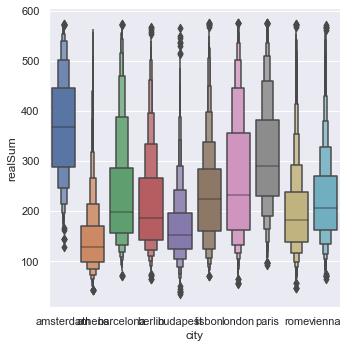

In [47]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="city", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="city", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("city"),
    x="city", y="realSum", kind="boxen",
)
print("amsterdam:\n",(data['realSum'].loc[data['city']== 'amsterdam']).describe())
print("athens:\n",(data['realSum'].loc[data['city']== 'athens']).describe())
print("barcelona:\n",(data['realSum'].loc[data['city']== 'barcelona']).describe())
print("berlin:\n",(data['realSum'].loc[data['city']=='berlin']).describe())
print("budapest:\n",(data['realSum'].loc[data['city']== 'budapest']).describe())
print("lisbon:\n",(data['realSum'].loc[data['city']=='lisbon']).describe())
print("london:\n",(data['realSum'].loc[data['city']== 'london']).describe())
print("paris:\n",(data['realSum'].loc[data['city']== 'paris']).describe())
print("rome:\n",(data['realSum'].loc[data['city']== 'rome']).describe())
print("vienna:\n",(data['realSum'].loc[data['city']== 'vienna']).describe())

# b9) weekdays
Analysis:

weekdays:
 count    23745.000000
mean       224.931383
std        110.582791
min         37.129295
25%        140.742992
50%        196.895292
75%        281.485984
max        576.008948
Name: realSum, dtype: float64
weekends:
 count    24300.000000
mean       232.937156
std        113.318872
min         34.779339
25%        148.020574
50%        205.972025
75%        293.130767
max        576.008948
Name: realSum, dtype: float64


<Figure size 720x7200 with 0 Axes>

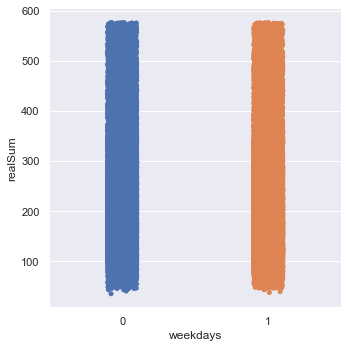

<Figure size 720x7200 with 0 Axes>

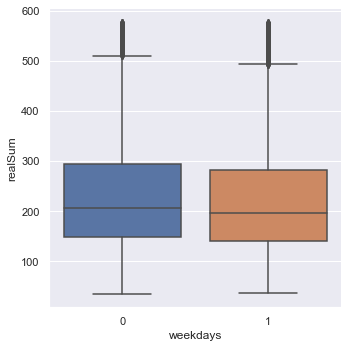

<Figure size 720x7200 with 0 Axes>

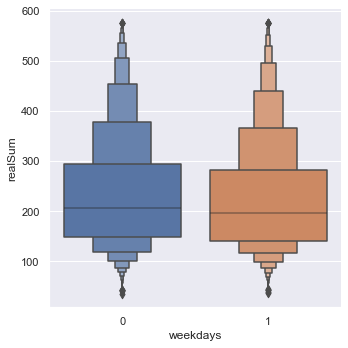

In [48]:
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="weekdays", y="realSum")
plt.figure(figsize=(10,100))
sb.catplot(data=data, x="weekdays", y="realSum", kind="box")
plt.figure(figsize=(10,100))
sb.catplot(
    data=data.sort_values("weekdays"),
    x="weekdays", y="realSum", kind="boxen",
)
print("weekdays:\n",(data['realSum'].loc[data['weekdays']== 1]).describe())
print("weekends:\n",(data['realSum'].loc[data['weekdays']== 0]).describe())

# SMOTETomek Resampling on training data

In [49]:
# Select numerical variables only
X_train = X_train[['dist','metro_dist','guest_satisfaction_overall']]
X_train.head()

NameError: name 'X_train' is not defined